## Who are the characters in Harry Potter?

### Questions to answer
- 1- How many character by gender? 
- 2-How many caracter by House and Gender?
- 3-How many caracter by House and Loyalty?
- 4-How many caracter by House and Blood-Status?
- 5-How many caracter by Specie and Loyalty?
- 6- What is the most comoon skill by House?
- 7- Quantity of Skills x House
- 8- Quantity of Skills x Blood Status
- 9- Quantity of Skills x Loyalty
- 10- Distribuition of age death

### Import modules required

In [50]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import nltk
import string

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from string import punctuation
import re # Regex
from nltk.probability import FreqDist

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juml_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juml_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read data

In [51]:
df_caracter = pd.read_csv('../data/characters.csv',sep=';',skipinitialspace = True)
df_caracter.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN


In [52]:
df_short_caracter = pd.read_csv('../data/shortversioncharacters.csv',skipinitialspace = True)
df_short_caracter.head(2)

,name,species,gender,house,dateOfBirth,yearOfBirth,ancestry,eyeColour,hairColour,wand,patronus,hogwartsStudent,hogwartsStaff,actor,alive,image
0,Harry Potter,human,male,Gryffindor,31-07-1980,1980.0,half-blood,green,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False,Daniel Radcliffe,True,http://hp-api.herokuapp.com/images/harry.jpg
1,Hermione Granger,human,female,Gryffindor,19-09-1979,1979.0,muggleborn,brown,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False,Emma Watson,True,http://hp-api.herokuapp.com/images/hermione.jpeg


## Validade data

In [53]:
print('df_caracter size ' + str(df_caracter.shape[0]))
print('df_short_caracter size ' + str(df_short_caracter.shape[0]))

df_caracter size 140
df_short_caracter size 25


In [54]:
## check nan values
print(df_caracter.isnull().sum())

Id               0
Name             0
Gender           1
Job             19
House           39
Wand             8
Patronus        10
Species          0
Blood status    17
Hair colour     17
Eye colour      54
Loyalty         51
Skills          27
Birth           13
Death           98
dtype: int64


In [55]:
print(df_short_caracter.isnull().sum())

name                0
species             0
gender              0
house               3
dateOfBirth        11
yearOfBirth         8
ancestry            5
eyeColour           4
hairColour          0
wand                0
patronus           12
hogwartsStudent     0
hogwartsStaff       0
actor               0
alive               0
image               0
dtype: int64


In [56]:
## check duplicate character
duplicateRows_df_caracter = df_caracter[df_caracter.duplicated(['Name', 'Wand','Patronus'])]
duplicateRows_df_short_caracter= df_short_caracter[df_short_caracter.duplicated(['image','name','name'])]

print("Duplicate Rows based on 3 columns are:", duplicateRows_df_short_caracter, sep='\n')
print("Duplicate Rows based on 3 columns are:", duplicateRows_df_caracter, sep=';')

Duplicate Rows based on 3 columns are:
Empty DataFrame
Columns: [name, species, gender, house, dateOfBirth, yearOfBirth, ancestry, eyeColour, hairColour, wand, patronus, hogwartsStudent, hogwartsStaff, actor, alive, image]
Index: []
Duplicate Rows based on 3 columns are:;Empty DataFrame
Columns: [Id, Name, Gender, Job, House, Wand, Patronus, Species, Blood status, Hair colour, Eye colour, Loyalty, Skills, Birth, Death]
Index: []


In [57]:
## try:
    # from urllib.request import urlretrieve  # Python 3
## except ImportError:
##    from urllib import urlretrieve  # Python 2

# url = "http://hp-api.herokuapp.com/images/harry.jpg"
# urlretrieve(url, "local-filename.jpg")

## Transform data

In [58]:
## Column with First Name and Last Name
df_caracter.loc[df_caracter['Name'].str.split().str.len() > 0, 'first_name'] = df_caracter['Name'].str.split().str[:1]
df_caracter['first_name'] = df_caracter['first_name'].str.get(0)
df_caracter['first_name'] = df_caracter['first_name'].str.upper()

df_short_caracter.loc[df_short_caracter['name'].str.split().str.len() > 0, 'first_name'] = df_short_caracter['name'].str.split().str[:1]
df_short_caracter['first_name'] = df_short_caracter['first_name'].str.get(0)
df_short_caracter['first_name'] = df_short_caracter['first_name'].str.upper()

df_caracter.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death,first_name
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN,HARRY
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN,RONALD


In [59]:
## Join dataframe throught First Name
df_caracter_final = df_caracter.merge(df_short_caracter[['yearOfBirth', 'ancestry', 'first_name','image']], how = 'left', left_on = 'first_name', right_on = 'first_name')
df_caracter_final.replace(np.nan, 0, inplace=True)
df_caracter_final.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death,first_name,yearOfBirth,ancestry,image
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,0,HARRY,1980.0,half-blood,http://hp-api.herokuapp.com/images/harry.jpg
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,0,RONALD,0.0,0,0


In [60]:
## check 0 rows
(df_caracter_final==0).sum(axis=0)

Id                0
Name              0
Gender            1
Job              19
House            39
Wand              8
Patronus         10
Species           0
Blood status     17
Hair colour      17
Eye colour       54
Loyalty          51
Skills           27
Birth            13
Death            98
first_name        0
yearOfBirth     126
ancestry        123
image           119
dtype: int64

In [61]:
## check 0 row for Gender
df_caracter_final[df_caracter_final.Gender == 0]

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death,first_name,yearOfBirth,ancestry,image
51,52,Horace Eugene Flaccus Slughorn,0,Professor of Potions,Slytherin,"10¼"" Cedar dragon heartstring fairly flexible",Non-corporeal,Human,Pure-blood or half-blood,Bald,Gooseberry,0,"Accomplished Occlumens, expert Potioneer, adva...",28 April,0,HORACE,0.0,pure-blood,http://hp-api.herokuapp.com/images/slughorn.JPG


In [62]:
## set male gender for Horace
df_caracter_final.loc[df_caracter_final['Name'] =='Horace Eugene Flaccus Slughorn', ['Gender']] = 'Male'
df_caracter_final[df_caracter_final.Name == 'Horace Eugene Flaccus Slughorn']

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death,first_name,yearOfBirth,ancestry,image
51,52,Horace Eugene Flaccus Slughorn,Male,Professor of Potions,Slytherin,"10¼"" Cedar dragon heartstring fairly flexible",Non-corporeal,Human,Pure-blood or half-blood,Bald,Gooseberry,0,"Accomplished Occlumens, expert Potioneer, adva...",28 April,0,HORACE,0.0,pure-blood,http://hp-api.herokuapp.com/images/slughorn.JPG


In [63]:
## convert to string
df_caracter_final['Gender'] = df_caracter_final['Gender'].astype('str') 
df_caracter_final['House'] = df_caracter_final['House'].astype('str') 
df_caracter_final['Job'] = df_caracter_final['Job'].astype('str') 

In [64]:
df_caracter_final.dtypes

Id                int64
Name             object
Gender           object
Job              object
House            object
Wand             object
Patronus         object
Species          object
Blood status     object
Hair colour      object
Eye colour       object
Loyalty          object
Skills           object
Birth            object
Death            object
first_name       object
yearOfBirth     float64
ancestry         object
image            object
dtype: object

In [65]:
## column with date of death and birth
df_caracter_final['Death'] = df_caracter_final['Death'].str.strip()
df_caracter_final['year_Death'] = df_caracter_final['Death'].str[-4:]

df_caracter_final['Birth'] = df_caracter_final['Birth'].str.strip()
df_caracter_final['year_Birth'] = df_caracter_final['Birth'].str[-4:]
df_caracter_final.replace(np.nan, 0, inplace=True)

df_caracter_final["year_Death"] = pd.to_numeric(df_caracter_final.year_Death, errors='coerce')
df_caracter_final['year_Birth'] = np.where(df_caracter_final['yearOfBirth']==0 ,df_caracter_final['year_Birth'], df_caracter_final['yearOfBirth'])
df_caracter_final["year_Birth"] = pd.to_numeric(df_caracter_final.year_Birth, errors='coerce')

## column with age of death
df_caracter_final['age_death'] = np.where((df_caracter_final['year_Death']>0.0)&(df_caracter_final['year_Birth']>0.0), df_caracter_final['year_Death']- df_caracter_final['year_Birth'], 0)
df_caracter_final.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,...,Skills,Birth,Death,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,0,HARRY,1980.0,half-blood,http://hp-api.herokuapp.com/images/harry.jpg,0.0,1980.0,0.0
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,...,Wizard chess | Quidditch goalkeeping,1 March 1980,0,RONALD,0.0,0,0,0.0,1980.0,0.0


In [66]:
## counting total of skills and loyalty
df_caracter_final['Skills'] = df_caracter_final['Skills'].str.strip()
df_caracter_final['Loyalty'] = df_caracter_final['Loyalty'].str.strip()
df_caracter_final['Skills'] = df_caracter_final['Skills'].str.replace('|',',')
df_caracter_final['Loyalty'] = df_caracter_final['Loyalty'].str.replace('|',',')
df_caracter_final['total_skill'] = df_caracter_final['Skills'].str.count(',')
df_caracter_final['total_loyalty'] = df_caracter_final['Loyalty'].str.count(',')
df_caracter_final['total_skill'] = df_caracter_final['total_skill']  + 1
df_caracter_final['total_loyalty'] = df_caracter_final['total_loyalty']  + 1
df_caracter_final.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,...,Death,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,...,0,HARRY,1980.0,half-blood,http://hp-api.herokuapp.com/images/harry.jpg,0.0,1980.0,0.0,3.0,4.0
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,...,0,RONALD,0.0,0,0,0.0,1980.0,0.0,2.0,3.0


In [67]:
## create column with only one loyalt
df_caracter_final.Loyalty = df_caracter_final.Loyalty.astype(str)

df_caracter_final['Loyalty_view'] = pd.np.where(df_caracter_final.Loyalty.str.contains("Death Eaters"), "Death Eaters",
                    pd.np.where(df_caracter_final.Loyalty.str.contains("Ministry of Magic"), "Minister of Magic",
                    pd.np.where(df_caracter_final.Loyalty.str.contains("Phoenix"), "Order of the Phoenix",
                    pd.np.where(df_caracter_final.Loyalty.str.contains("Dumbledore's Army"), "Dumbledore's Army", df_caracter_final['Loyalty']))))

<ipython-input-67-a7628e7b916d>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_caracter_final['Loyalty_view'] = pd.np.where(df_caracter_final.Loyalty.str.contains("Death Eaters"), "Death Eaters",
<ipython-input-67-a7628e7b916d>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(df_caracter_final.Loyalty.str.contains("Ministry of Magic"), "Minister of Magic",
<ipython-input-67-a7628e7b916d>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(df_caracter_final.Loyalty.str.contains("Phoenix"), "Order of the Phoenix",
<ipython-input-67-a7628e7b916d>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(df_cara

In [68]:
df_caracter_final[df_caracter_final.Name=='Godric Gryffindor']

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,...,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view
68,69,Godric Gryffindor,Male,Founder of Gryffindor,Gryffindor,Unknown,Unknown,Human,Pure-blood or half-blood,Red,...,GODRIC,0.0,0,0,NaN,NaN,0.0,1.0,NaN,nan


In [69]:
## replace column values
df_caracter_final.replace({'House': 'Beauxbatons Academy of Magic'}, 'Beauxbatons',inplace=True)
df_caracter_final.replace({'House': 'Durmstrang Institute'}, 'Durmstrang',inplace=True)
df_caracter_final.replace({'Loyalty_view': 'Hogwarts School of Witchcraft and Wizardry'}, 'Hogwarts School',inplace=True)

In [70]:
## remove space in columns names
df_caracter_final.columns = df_caracter_final.columns.str.replace(' ', '_')
df_caracter_final.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,...,HARRY,1980.0,half-blood,http://hp-api.herokuapp.com/images/harry.jpg,0.0,1980.0,0.0,3.0,4.0,Order of the Phoenix
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,...,RONALD,0.0,0,0,0.0,1980.0,0.0,2.0,3.0,Order of the Phoenix


In [71]:
## convert to lower and remove space \xa0
df_caracter_final['Blood_status'] = df_caracter_final['Blood_status'].apply(lambda x: str(x).replace(u'\xa0', u'-'))
df_caracter_final['Blood_status'] = df_caracter_final['Blood_status'].apply(lambda x: str(x).replace(u' ', u'-'))
df_caracter_final['Blood_status'] = df_caracter_final.Blood_status.str.lower()
df_caracter_final.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,half-blood,Black,...,HARRY,1980.0,half-blood,http://hp-api.herokuapp.com/images/harry.jpg,0.0,1980.0,0.0,3.0,4.0,Order of the Phoenix
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,pure-blood,Red,...,RONALD,0.0,0,0,0.0,1980.0,0.0,2.0,3.0,Order of the Phoenix


In [72]:
## remove spaces
df_caracter_final['Species'] = df_caracter_final['Species'].str.strip()
df_caracter_final['House'] = df_caracter_final['House'].str.strip()

In [73]:
df_caracter_final.dtypes

Id                 int64
Name              object
Gender            object
Job               object
House             object
Wand              object
Patronus          object
Species           object
Blood_status      object
Hair_colour       object
Eye_colour        object
Loyalty           object
Skills            object
Birth             object
Death             object
first_name        object
yearOfBirth      float64
ancestry          object
image             object
year_Death       float64
year_Birth       float64
age_death        float64
total_skill      float64
total_loyalty    float64
Loyalty_view      object
dtype: object

In [74]:
df_caracter_final.replace(np.nan, 0, inplace=True)
df_caracter_final.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,half-blood,Black,...,HARRY,1980.0,half-blood,http://hp-api.herokuapp.com/images/harry.jpg,0.0,1980.0,0.0,3.0,4.0,Order of the Phoenix
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,pure-blood,Red,...,RONALD,0.0,0,0,0.0,1980.0,0.0,2.0,3.0,Order of the Phoenix


In [75]:
## dataframe without 0 values:
df_caracter_house = df_caracter_final.drop(df_caracter_final[(df_caracter_final['House'] == '0') | (df_caracter_final['House'] == 0) | (df_caracter_final['House'] == 'nan')].index)
df_caracter_skill = df_caracter_final.drop(df_caracter_final[(df_caracter_final['Skills'] == '0') | (df_caracter_final['Skills'] == 0)].index)
df_caracter_death = df_caracter_final.drop(df_caracter_final[(df_caracter_final['age_death'] == 0.0)].index)
df_caracter_loyalt = df_caracter_final.drop(df_caracter_final[(df_caracter_final['Loyalty_view'] == '0') | (df_caracter_final['Loyalty_view'] == 'nan')].index)

In [76]:
## consider main houses:
df_caracter_house = df_caracter_house.drop(df_caracter_house[(df_caracter_house['House'] == 'Beauxbatons') | (df_caracter_house['House'] == 'Durmstrang')].index)
df_caracter_house.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,half-blood,Black,...,HARRY,1980.0,half-blood,http://hp-api.herokuapp.com/images/harry.jpg,0.0,1980.0,0.0,3.0,4.0,Order of the Phoenix
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,pure-blood,Red,...,RONALD,0.0,0,0,0.0,1980.0,0.0,2.0,3.0,Order of the Phoenix


## Explore data

In [77]:
data = df_caracter_final.Name.nunique()
population = 772
### source: https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters

perc = data/population

In [78]:
print ("There are {} characters in this dataset. ".format(data))

There are 140 characters in this dataset. 


In [79]:
print("There are about " + str(population) +  " characters in the universe from Harry Potter. This analysis gives information about the main characters,\n approximately "+"{:.2%}".format(perc) + " of the population")

There are about 772 characters in the universe from Harry Potter. This analysis gives information about the main characters,
 approximately 18.13% of the population


## 1- How many character by gender? 

In [80]:
sizes_gender = df_caracter_final.Gender.value_counts()
sizes_gender

Male      91
Female    49
Name: Gender, dtype: int64

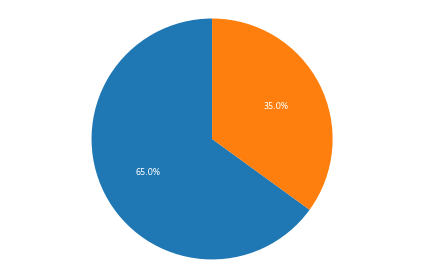

In [81]:
labels = ['Male', 'Female']
fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes_gender, labels=labels, autopct='%1.1f%%', startangle=90)
fig = plt.gcf()
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.rcParams["font.family"] = "calibri"
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# plt.title("Percentage of caracter by Gender", fontsize=14)
plt.show();
fig.savefig('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/gender.png',bbox_inches='tight',transparent=True); 

## 2-How many caracter by House and Gender? <br>

In [82]:
sizes_sch = df_caracter_final.House.value_counts()
sizes_sch

0              39
Gryffindor     38
Slytherin      28
Ravenclaw      18
Hufflepuff     13
Beauxbatons     3
Durmstrang      1
Name: House, dtype: int64

In [83]:
## checking human caracter without school data:
df_caracter_final[(df_caracter_final.House=='0')&(df_caracter_final.Job!='0')&(df_caracter_final.Species=='Human')][0:5]

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view
72,73,Barty Crouch Jr.,Male,Professor of Defence Against the Dark Arts (as...,0,Unknown,Unknown,Human,pure-blood-or-half-blood,Straw blond,...,BARTY,0.0,0,0,1996.0,1962.0,34.0,1.0,2.0,Death Eaters
73,74,Charity Burbage,Female,Professor of Muggle Studies,0,Unknown,Non-corporeal,Human,pure-blood-or-half-blood,Blonde,...,CHARITY,0.0,0,0,1997.0,1976.0,21.0,1.0,0.0,nan
93,94,Igor Karkaroff,Male,Headmaster of Durmstrang Institute,0,Unknown,None,Human,pure-blood-or-half-blood,Silver| formerly black,...,IGOR,0.0,0,0,1996.0,1965.0,31.0,1.0,0.0,nan
94,95,Kingsley Shacklebolt,Male,Auror | Minister for Magic,0,Unknown,Lynx,Human,pure-blood,Bald,...,KINGSLEY,0.0,pure-blood,http://hp-api.herokuapp.com/images/kingsley.jpg,0.0,1973.0,0.0,1.0,1.0,Order of the Phoenix
95,96,Alastor Moody,Male,Auror,0,Unknown,Non-corporeal,Human,pure-blood,Grey,...,ALASTOR,0.0,0,0,1997.0,1960.0,37.0,2.0,1.0,Order of the Phoenix


In [84]:
sizes_sch = df_caracter_house.House.value_counts()
sizes_sch

Gryffindor    38
Slytherin     28
Ravenclaw     18
Hufflepuff    13
Name: House, dtype: int64

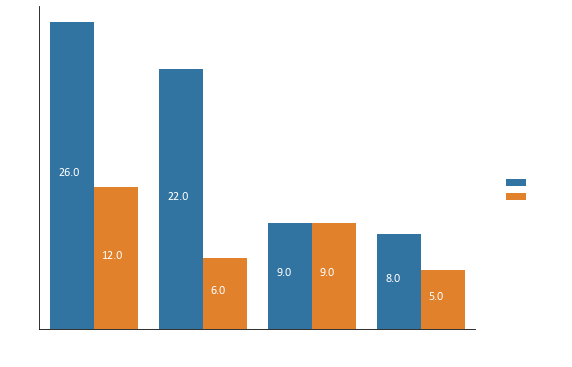

In [85]:
## group by house and gender:
df_gender_house_gp = df_caracter_house.groupby(['House','Gender']) \
                     .agg({'Name':'count'}) \
                     .reset_index()
## sort dataframe:
df_gender_house_gp = df_gender_house_gp.sort_values('Name', ascending=False)

g = sns.catplot(x="House", y="Name", hue="Gender", kind="bar", data=df_gender_house_gp)
# g.fig.suptitle("Quantity of caracter by gender in each house",fontsize=14, y=1.03)
g.set_xlabels('house',fontsize=12)
g.set_ylabels('quantity',fontsize=12)

for p in g.ax.patches:
    x1 = p.get_x() + p.get_width()*0.18
    y = p.get_y() + p.get_height()/2
    g.ax.annotate(p.get_height(), (x1, y),fontsize=12)

plt.xticks(rotation=360)
plt.rcParams["font.family"] = "calibri"

figs = plt.gcf()
figs.set_size_inches(8, 5)
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
figs.savefig('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/house.png',bbox_inches='tight',transparent=True); 

## 3-How many caracter by House and Loyalty? <br>

In [86]:
## group by house and loyalty:
df_lo_house_gp = df_caracter_house.groupby(['House','Blood_status','Loyalty_view']) \
                     .agg({'Name':'count',
                      'total_skill':'mean'}) \
                     .reset_index()
df_lo_house_gp.head(2)

,House,Blood_status,Loyalty_view,Name,total_skill
0,Gryffindor,0,nan,1,0.0
1,Gryffindor,half-blood,Dumbledore's Army,1,1.0


In [87]:
## checking lord voldemort in Ravenclaw
df_caracter_house[(df_caracter_house.House=='Ravenclaw')&(df_caracter_house.Loyalty=='Lord Voldemort')]

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,first_name,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view
32,33,Quirinus Quirrell,Male,Defence Against the Dark Arts(1991-1992),Ravenclaw,"9"" Alder unicorn hair bendy",Non-corporeal,Human,half-blood,0,...,QUIRINUS,0.0,0,0,1992.0,0.0,0.0,2.0,1.0,Lord Voldemort


In [88]:
## pivot to plot
data_lol_house = df_lo_house_gp.drop(df_lo_house_gp[(df_lo_house_gp['Loyalty_view'] == 'nan')].index)

df_pivot_lol_house = data_lol_house.pivot_table(index='House', columns='Loyalty_view', values='Name', aggfunc = "sum")
## replace nan for zero
df_pivot_lol_house.replace(np.nan, 0, inplace=True)
df_pivot_lol_house

Loyalty_view,Death Eaters,Dumbledore's Army,Hogwarts School,Lord Voldemort,Minister of Magic,Order of the Phoenix
House,,,,,,
Gryffindor,1.0,11.0,1.0,0.0,2.0,19.0
Hufflepuff,0.0,5.0,0.0,0.0,1.0,1.0
Ravenclaw,0.0,6.0,0.0,1.0,0.0,0.0
Slytherin,10.0,0.0,0.0,0.0,1.0,0.0


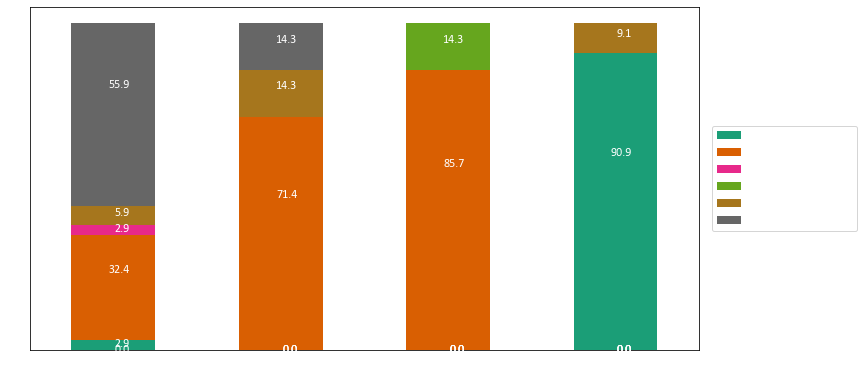

In [89]:
stacked_data = df_pivot_lol_house.apply(lambda x: x*100/sum(x), axis=1)
fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

# col = sns.color_palette("hls", 11)
stacked_data.plot(kind='bar', stacked=True, ax=ax, width=width, position=1,fontsize=10,colormap='Dark2')

figs = plt.gcf()
fig.set_size_inches(12, 7)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height:.1f}'  # f'{height:.2f}' to format decimal values

    # ax.text(x, y, text)
    label_x = x + 0.35  # adjust 0.2 to center the label
    label_y = y + height / 1.5
    ax.text(label_x, label_y, label_text, ha='right', va='center', fontsize=12)
    
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=12)
ax.grid(False)
figs.autofmt_xdate(rotation=360)
# plt.title("Percentage of caracter by Loyalty in each house", fontsize=14)
plt.rcParams["font.family"] = "calibri"
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
fig.savefig('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/house_loyalt.png',bbox_inches='tight',transparent=True)
plt.show();    

## 4-How many caracter by House and Blood-Status?

In [90]:
## pivot to plot
data_blood_house = df_lo_house_gp.drop(df_lo_house_gp[(df_lo_house_gp['Blood_status'] == '0') | (df_lo_house_gp['Blood_status'] == 'unknown')].index)

df_pivot_blood_house = data_blood_house.pivot_table(index='House', columns='Blood_status', values='Name', aggfunc = "sum")
## replace nan for zero
df_pivot_blood_house.replace(np.nan, 0, inplace=True)
df_pivot_blood_house

Blood_status,half-blood,half-blood-or-pure-blood,muggle-born,muggle-born-or-half-blood[,part-goblin,part-human-(half-giant),pure-blood,pure-blood-or-half-blood
House,,,,,,,,
Gryffindor,7.0,1.0,5.0,0.0,0.0,1.0,14.0,8.0
Hufflepuff,4.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0
Ravenclaw,6.0,0.0,1.0,1.0,1.0,0.0,0.0,8.0
Slytherin,5.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0


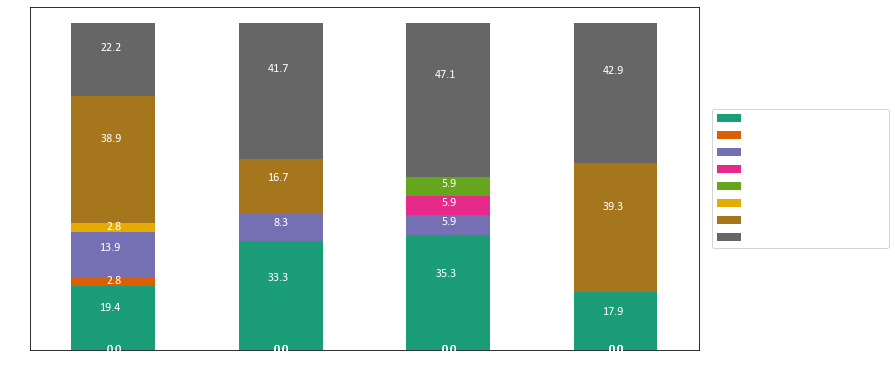

In [91]:
stacked_data = df_pivot_blood_house.apply(lambda x: x*100/sum(x), axis=1)
fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

col = sns.color_palette("hls", 11)
stacked_data.plot(kind='bar', stacked=True, ax=ax, width=width, position=1,fontsize=10,colormap='Dark2')

figs = plt.gcf()
fig.set_size_inches(12, 7)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height:.1f}'  # f'{height:.2f}' to format decimal values

    # ax.text(x, y, text)
    label_x = x + 0.30  # adjust 0.2 to center the label
    label_y = y + height / 1.5
    ax.text(label_x, label_y, label_text, ha='right', va='center', fontsize=12)
    
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=12)
ax.grid(False)
figs.autofmt_xdate(rotation=360)
# plt.title("Percentage of caracter by Blood Status in each house", fontsize=14)
plt.rcParams["font.family"] = "calibri"
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
fig.savefig('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/house_bloods_status.png',bbox_inches='tight',transparent=True)
plt.show();    

In [92]:
## group by blood status:
df_blood_skill_gp = df_caracter_house.groupby(['Blood_status']) \
                     .agg({'Name':'count',
                      'total_skill':'mean'}) \
                     .reset_index()
data_blood_skill = df_blood_skill_gp.drop(df_blood_skill_gp[(df_blood_skill_gp['Blood_status'] == '0') | (df_blood_skill_gp['Blood_status'] == 'unknown')].index)
data_blood_skill = data_blood_skill.sort_values('total_skill',ascending = False)

## round
decimals = 2    
data_blood_skill['total_skill'] = data_blood_skill['total_skill'].apply(lambda x: round(x, decimals))
data_blood_skill

,Blood_status,Name,total_skill
6,part-human-(half-giant),1,3.00
7,pure-blood,27,1.37
1,half-blood,22,1.32
8,pure-blood-or-half-blood,33,1.27
2,half-blood-or-pure-blood,1,1.00
4,muggle-born-or-half-blood[,1,1.00
5,part-goblin,1,1.00
3,muggle-born,7,0.43


In [93]:
# g = sns.catplot(x='Blood_status', y='total_skill', data=data_blood_skill, kind='bar',aspect=2.7,ci=None);
# g.fig.suptitle("Média de Skill por Blood Status", y=1.02,fontsize=14);
# g.set_ylabels('total skill',fontsize=12);

# for p in g.ax.patches:
#     x1 = p.get_x() + p.get_width()*0.35
#     y = (p.get_y() + p.get_height()/3)
#     g.ax.annotate(p.get_height(), (x1, y),fontsize=12)
# g.set_xticklabels(fontsize=10)

# plt.xticks(rotation=40)
# plt.rcParams["font.family"] = "calibri"

# figs = plt.gcf()
# figs.set_size_inches(10, 5)
# figs.savefig('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/house.png',bbox_inches='tight'); 

# plt.show()

## 5-How many caracter by Specie and Loyalty? <br>

In [94]:
## group by loyalty and specie:
df_lo_spec_gp = df_caracter_loyalt.groupby(['Loyalty_view','Species']) \
                     .agg({'Name':'count'}) \
                     .reset_index()
df_lo_spec_gp.head(2)

,Loyalty_view,Species,Name
0,Death Eaters,Human,12
1,Death Eaters,Werewolf,1


In [95]:
## pivot to plot
df_pivot_lol_spec = df_lo_spec_gp.pivot_table(index='Loyalty_view', columns='Species', values='Name', aggfunc = "sum")

## replace nan for zero
df_pivot_lol_spec.replace(np.nan, 0, inplace=True)
df_pivot_lol_spec

Species,Half-Human/Half-Giant,Human,Human (Werewolf traits),Werewolf
Loyalty_view,,,,
Death Eaters,0.0,12.0,0.0,1.0
Dumbledore's Army,0.0,22.0,0.0,0.0
Gellert Grindelwald's Acolytes,0.0,1.0,0.0,0.0
Hogwarts School,0.0,8.0,0.0,0.0
Lord Voldemort,0.0,1.0,0.0,0.0
Minister of Magic,0.0,8.0,0.0,0.0
Order of the Phoenix,1.0,33.0,1.0,1.0


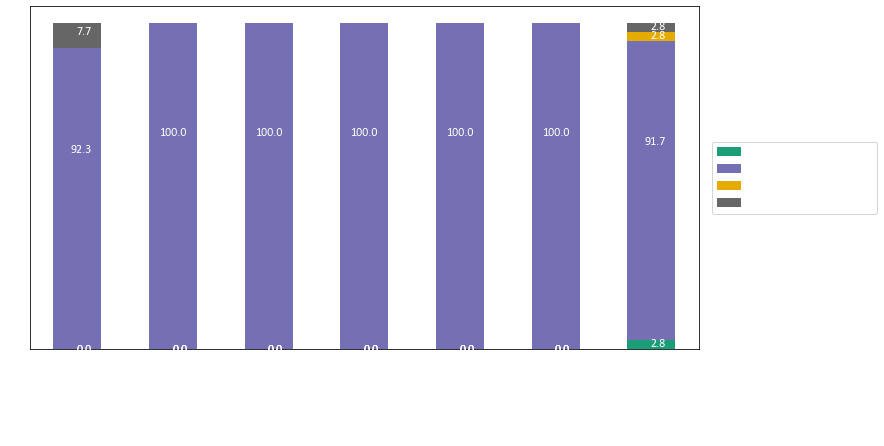

In [112]:
stacked_data = df_pivot_lol_spec.apply(lambda x: x*100/sum(x), axis=1)
fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

col = sns.color_palette("hls", 11)
stacked_data.plot(kind='bar', stacked=True, ax=ax, width=width, position=1,fontsize=10,colormap='Dark2')

figs = plt.gcf()
fig.set_size_inches(12, 7)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height:.1f}'  # f'{height:.2f}' to format decimal values

    # ax.text(x, y, text)
    label_x = x + 0.4  # adjust 0.2 to center the label
    label_y = y + height / 1.5
    ax.text(label_x, label_y, label_text, ha='right', va='center', fontsize=12)
    
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=12)
ax.grid(False)
figs.autofmt_xdate(rotation=30)
# plt.title("Percentage of caracter by Loyalty and specie", fontsize=14)
plt.rcParams["font.family"] = "calibri"
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
fig.savefig('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/specie_loyalt.png',bbox_inches='tight',transparent=True)
plt.show(); 

## 6- What is the most comoon skill by House? <br>

In [97]:
## lower
df_caracter_skill['skills_lower'] = [str(token).lower() for token in df_caracter_skill['Skills']]
df_caracter_skill.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view,skills_lower
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,half-blood,Black,...,1980.0,half-blood,http://hp-api.herokuapp.com/images/harry.jpg,0.0,1980.0,0.0,3.0,4.0,Order of the Phoenix,"parseltongue, defence against the dark arts , ..."
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,pure-blood,Red,...,0.0,0,0,0.0,1980.0,0.0,2.0,3.0,Order of the Phoenix,"wizard chess , quidditch goalkeeping"


In [98]:
df_caracter_skill.loc[df_caracter_skill['Skills'] =='nan']

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,yearOfBirth,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view,skills_lower


In [99]:
## Regex to find punctuations inside the text
other_punctuation_reg = r'(\.{2,}|-+|—+|\|+)'
other_punctuation_finds = []

# find punctuations
for text in df_caracter_skill.skills_lower:
    p = re.search(other_punctuation_reg, text)
    if p:
        other_punctuation_finds.append(p.group())

## Generate list with stopwords in english  
english_stopswords = set(stopwords.words('english') + list(punctuation) + other_punctuation_finds)

## Option to add others stopwords in list
# english_stopswords.add(',')

In [100]:
df_caracter_skill.skills_lower = df_caracter_skill.skills_lower.astype(str)
df_caracter_skill.skills_lower = df_caracter_skill.skills_lower.apply(lambda x : x.replace(',',''))
df_caracter_skill['skills__semStopWords'] = df_caracter_skill['skills_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stopswords)]))
df_caracter_skill.head(2)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood_status,Hair_colour,...,ancestry,image,year_Death,year_Birth,age_death,total_skill,total_loyalty,Loyalty_view,skills_lower,skills__semStopWords
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,half-blood,Black,...,half-blood,http://hp-api.herokuapp.com/images/harry.jpg,0.0,1980.0,0.0,3.0,4.0,Order of the Phoenix,parseltongue defence against the dark arts se...,parseltongue defence dark arts seeker
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,pure-blood,Red,...,0,0,0.0,1980.0,0.0,2.0,3.0,Order of the Phoenix,wizard chess quidditch goalkeeping,wizard chess quidditch goalkeeping


In [101]:
def freq_Words(text, number,titulo):
    words = word_tokenize(text)
    fdist = FreqDist(word for word in words)
    XY = fdist.items()
    XY = sorted(XY, key=lambda pair: pair[1], reverse=True)
    limit = number
    X = [x for (x,y) in XY[:limit]]
    Y = [y for (x,y) in XY[:limit]]
    nX = range(len(X))
    
    data = list(zip(Y, X))
    df = pd.DataFrame(data,
                  columns = ['count', 'tokens'])

    fig, ax = plt.subplots()

    df.plot(x ='tokens', y='count', label='count tokens', color = "red",ax=ax)
        
    plt.xticks(rotation='60')
    plt.xlabel('Tokens')
    plt.ylabel('count')
    plt.legend(loc='upper right', fontsize='small')
    plt.tight_layout()
    figs = plt.gcf()
    figs.set_size_inches(7, 6)

    plt.title("Most frequent Skills - {}".format(titulo),fontsize=14)
    plt.rcParams["font.family"] = "calibri"
    plt.show()
    return fdist

In [102]:
## create diferente dataframe for each House
df_gryffindor = df_caracter_skill[df_caracter_skill.House=='Gryffindor'].copy()
df_hufflepuff = df_caracter_skill[df_caracter_skill.House=='Hufflepuff'].copy()
df_ravenclaw = df_caracter_skill[df_caracter_skill.House=='Ravenclaw'].copy()
df_slytherin = df_caracter_skill[df_caracter_skill.House=='Slytherin'].copy()

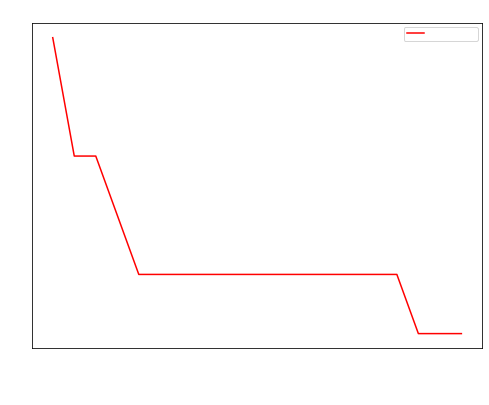

In [103]:
## join all messages on one text
df_gryffindor.skills__semStopWords=df_gryffindor.skills__semStopWords.astype(str)
list_skill = ' '.join(df_gryffindor.skills__semStopWords.tolist())
frequencia = freq_Words(list_skill,20,"Gryffindor")

In [104]:
# Joining all texts:

# with StopWords:
all_skills = " ".join(skill for skill in df_caracter_skill.skills_lower)

# without StopWords:
all_skills_withoutStopWord = " ".join(review for review in df_caracter_skill.skills__semStopWords)

print ("We have {} words joing all skills without stop words.".format(len(all_skills_withoutStopWord)))
print ("We have {} words joing all skills.".format(len(all_skills)))

We have 3408 words joing all skills without stop words.
We have 4067 words joing all skills.


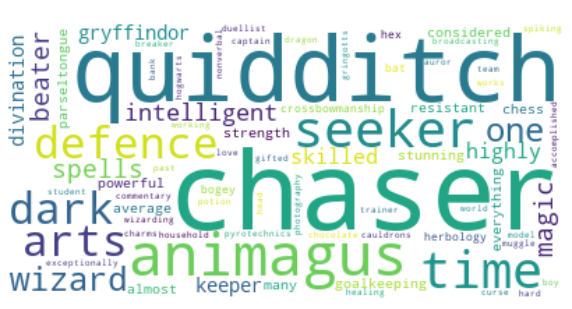

In [105]:
all_skills_withoutStopWord = " ".join(skill for skill in df_caracter_skill[df_caracter_skill.House == "Gryffindor"].skills__semStopWords)
     
plt.figure(figsize=(10,6))
wc = WordCloud(background_color="white").generate(all_skills_withoutStopWord)

plt.title('Gryffindor - Skills', fontsize=14)
plt.imshow(wc, interpolation='bilinear')
plt.rcParams["font.family"] = "calibri"
plt.axis("off")
wc.to_file('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/gryffindor_wc.jpg')
plt.show()

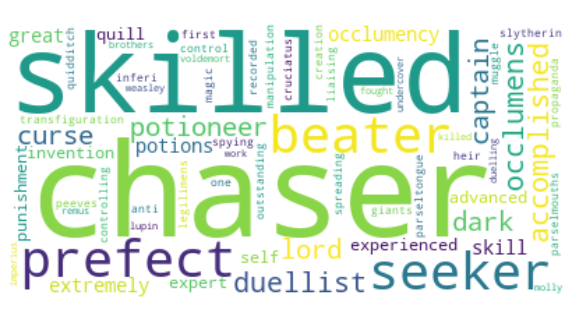

In [106]:
all_skills_withoutStopWord = " ".join(skill for skill in df_caracter_skill[df_caracter_skill.House == "Slytherin"].skills__semStopWords)
     
plt.figure(figsize=(10,6))
wc = WordCloud(background_color="white").generate(all_skills_withoutStopWord)

plt.title('Slytherin - Skills', fontsize=14)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.rcParams["font.family"] = "calibri"
wc.to_file('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/slytherin_wc.jpg')
plt.show()

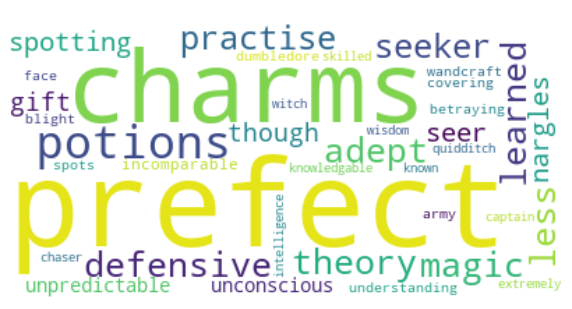

In [107]:
all_skills_withoutStopWord = " ".join(skill for skill in df_caracter_skill[df_caracter_skill.House == "Ravenclaw"].skills__semStopWords)
     
plt.figure(figsize=(10,6))
wc = WordCloud(background_color="white").generate(all_skills_withoutStopWord)

plt.title('Ravenclaw - Skills', fontsize=14)
plt.imshow(wc, interpolation='bilinear')
plt.rcParams["font.family"] = "calibri"
plt.axis("off")
wc.to_file('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/ravenclaw_wc.jpg')
plt.show()

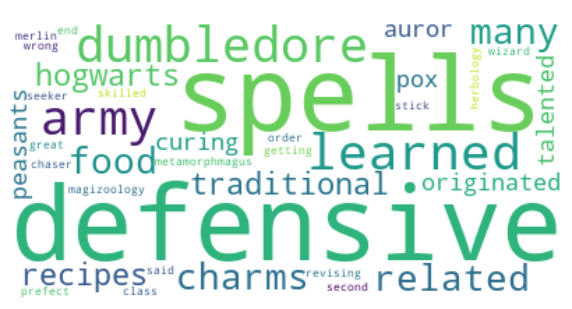

In [108]:
all_skills_withoutStopWord = " ".join(skill for skill in df_caracter_skill[df_caracter_skill.House == "Hufflepuff"].skills__semStopWords)
     
plt.figure(figsize=(10,6))
wc = WordCloud(background_color="White").generate(all_skills_withoutStopWord)

plt.title('Hufflepuff - Skills', fontsize=14)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.rcParams["font.family"] = "calibri"
wc.to_file('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/hufflepuff_wc.jpg')
plt.show()

## 7- Quantity of Skills x House

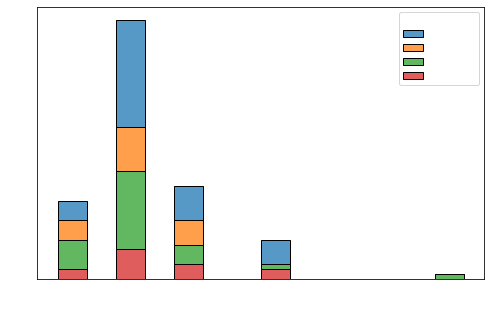

In [125]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

mean_distrib = round(df_caracter_house['total_skill'].mean(), 2)

sns.histplot(data=df_caracter_house, ax=ax, stat="count", multiple="stack",
             x="total_skill", kde=False, hue="House",
             element="bars",legend=True)

ax.set_xlabel("total_skill",fontsize = 12)
ax.set_ylabel("count")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=12)
# ax.set_title("Skill Histogram by House", fontsize=14)
plt.rcParams["font.family"] = "calibri"
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
f.savefig('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/hist_house.png',bbox_inches='tight',transparent=True)
plt.show();  

## 10- Distribuition of age death

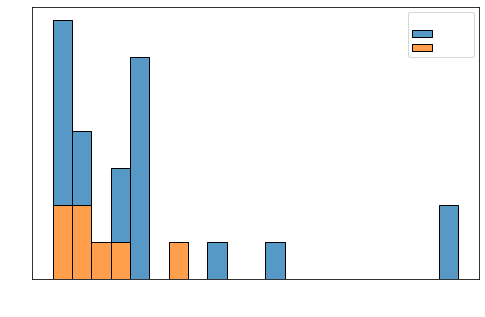

In [126]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

mean_distrib = round(df_caracter_death['age_death'].mean(), 2)

sns.histplot(data=df_caracter_death, ax=ax, stat="count", multiple="stack",
             x="age_death", kde=False, hue="Gender",
             element="bars", legend=True,binwidth = 5)

# ax.set_title("Age of Death Histogram by Gender", fontsize=14)
ax.set_xlabel("age_death",fontsize = 12)
ax.set_ylabel("count")

plt.rcParams["font.family"] = "calibri"
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
f.savefig('/Users/juml_/Documents/Projects/python-analysis/harry_potter/image/hist_death_gender.png',bbox_inches='tight',transparent=True)
plt.show();  

In [111]:
df_caracter_final.to_csv('df_final.csv')